<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Utiliser-des-arbres-pour-détecter-des-arbres" data-toc-modified-id="Utiliser-des-arbres-pour-détecter-des-arbres-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Utiliser des arbres pour détecter des arbres</a></span></li><li><span><a href="#Exercice-1-:-Forêts-aléatoires" data-toc-modified-id="Exercice-1-:-Forêts-aléatoires-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exercice 1 : Forêts aléatoires</a></span></li><li><span><a href="#Exercice-2-:-Autres-mesures" data-toc-modified-id="Exercice-2-:-Autres-mesures-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exercice 2 : Autres mesures</a></span></li><li><span><a href="#Exercice-3&nbsp;:-Importance-des-fonctionnalités" data-toc-modified-id="Exercice-3&nbsp;:-Importance-des-fonctionnalités-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exercice 3&nbsp;: Importance des fonctionnalités</a></span></li><li><span><a href="#Exercice-4&nbsp;:&nbsp;Sélection-des-fonctionnalités" data-toc-modified-id="Exercice-4&nbsp;:&nbsp;Sélection-des-fonctionnalités-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exercice 4&nbsp;:&nbsp;Sélection des fonctionnalités</a></span></li><li><span><a href="#Exercice-5-:-Matrice-de-confusion" data-toc-modified-id="Exercice-5-:-Matrice-de-confusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Exercice 5 : Matrice de confusion</a></span></li><li><span><a href="#Exercice-6-:-Un-modèle-de-second-niveau" data-toc-modified-id="Exercice-6-:-Un-modèle-de-second-niveau-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Exercice 6 : Un modèle de second niveau</a></span></li><li><span><a href="#Exercice-7-:-Calibrage-du-modèle" data-toc-modified-id="Exercice-7-:-Calibrage-du-modèle-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Exercice 7 : Calibrage du modèle</a></span></li><li><span><a href="#Exercice-8&nbsp;:-Boosting-de-dégradé" data-toc-modified-id="Exercice-8&nbsp;:-Boosting-de-dégradé-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Exercice 8&nbsp;: Boosting de dégradé</a></span></li></ul></div>

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR5zwbfIFGb2WTh4A8hZJbZ3U2lIpbkK3lhOQ&s)

# Lab 7 : Ensembles
## Utiliser des arbres pour détecter des arbres

Nous utiliserons des méthodes d'ensemble basées sur des arbres sur le [ensemble de données Covertype](https://www.openml.org/d/180).
Il contient environ 100 000 observations de 7 types d'arbres (épicéa, pin, peuplier, tremble,...) décrits par 55 caractéristiques décrivant l'altitude, la distance à l'eau, le type de sol, etc.

In [1]:
# Auto-setup when running on Google Colab
if 'google.colab' in str(get_ipython()):
    !pip install openml

# General imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openml as oml
import seaborn as sns

In [2]:
# Download Covertype data. Takes a while the first time.
covertype = oml.datasets.get_dataset(180)
X, y, _, _ = covertype.get_data(target=covertype.default_target_attribute, dataset_format='array'); 
classes = covertype.retrieve_class_labels()
features = [f.name for i,f in covertype.features.items()][:-1]

In [3]:
classes

['Aspen',
 'Cottonwood_Willow',
 'Douglas_fir',
 'Krummholz',
 'Lodgepole_Pine',
 'Ponderosa_Pine',
 'Spruce_Fir']

In [4]:
features[0:20]

['elevation',
 'aspect',
 'slope',
 'horizontal_distance_to_hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'wilderness_area1',
 'wilderness_area2',
 'wilderness_area3',
 'wilderness_area4',
 'soil_type_1',
 'soil_type_2',
 'soil_type_3',
 'soil_type_4',
 'soil_type_5',
 'soil_type_6']

Pour mieux comprendre les données, nous pouvons utiliser une matrice de dispersion (pairplot). De là, il semble que l’élévation soit une caractéristique pertinente.
Douglas Fir et  Aspen poussent à basse altitude, tandis que seuls les pins Krummholz survivent à très haute altitude.

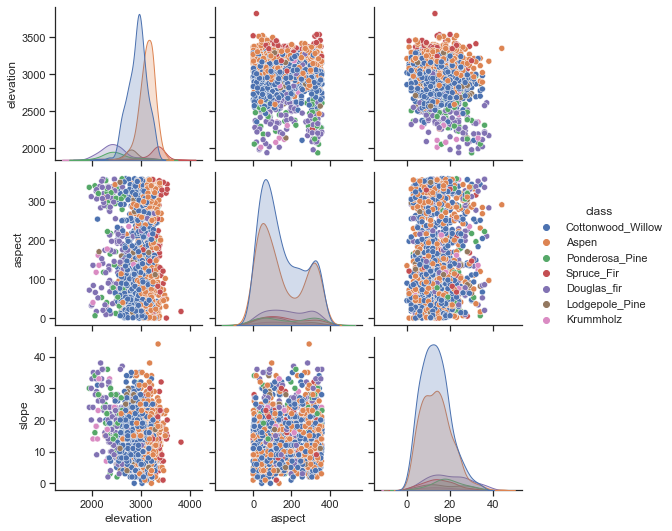

In [5]:
# Using seaborn to build the scatter matrix
# only first 3 columns, first 1000 examples
n_points = 1500
df = pd.DataFrame(X[:n_points,:3], columns=features[:3])
df['class'] = [classes[i] for i in y[:n_points]]
sns.set(style="ticks")
sns.pairplot(df, hue="class");

## Exercice 1 : Forêts aléatoires
Implémenter une fonction `evaluate_RF` qui mesure les performances d'un classificateur de forêt aléatoire, à l'aide d'arbres
de (max) profondeur 2,8,32,64, pour n'importe quel nombre d'arbres dans l'ensemble (`n_estimators`).
Pour l'évaluation, vous devez mesurer la précision à l'aide d'une validation croisée triple.
Utilisez `random_state=1` pour garantir la reproductibilité. Enfin, tracez les résultats pour au moins 5 valeurs de « n_estimators » allant de 1 à 30. Vous pouvez, bien sûr, réutiliser le code des laboratoires et devoirs précédents. Interprétez les résultats.
Vous pouvez prendre un sous-échantillon de 50 % pour accélérer le traçage.

## Exercice 2 : Autres mesures
Répétez le même tracé mais utilisez maintenant Balanced_accuracy comme mesure d'évaluation. Voir la [documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#balanced-accuracy-score).
Utilisez uniquement le max_degree optimal de la question précédente. Voyez-vous une différence importante ?

## Exercice 3 : Importance des fonctionnalités
Récupérez l'importance des fonctionnalités en fonction du modèle de forêt aléatoire (ajusté). Quelles fonctionnalités sont les plus importantes ?

## Exercice 4 : Sélection des fonctionnalités
Reconstruisez votre forêt aléatoire optimisée, mais cette fois en utilisant uniquement les 10 premières fonctionnalités.
Renvoie à la fois balanced_accuracy et le temps d’entraînement. Interprétez les résultats.

## Exercice 5 : Matrice de confusion
Effectuez train test split standard et générez la matrice de confusion de la forêt aléatoire entrainee. Quelles classes sont encore souvent confondues ?

## Exercice 6 : Un modèle de second niveau
Construisez un modèle binaire spécifiquement pour choisir correctement entre la première et la deuxième classe.
Sélectionnez uniquement les points de données avec ces classes et entraînez une nouvelle forêt aléatoire. Effectuez une division stratifiée standard et tracez la courbe ROC résultante. Peut-on encore améliorer le modèle en calibrant le seuil ?

## Exercice 7 : Calibrage du modèle
Pour le modèle de forêt aléatoire binaire entraîné, tracez une courbe d'étalonnage (voir [carnet de cours](https://ml-course.github.io/engineer/slides_html/03%20-%20Model%20Selection.slides.html#/40 )).
Ensuite, essayez de corriger cela en utilisant la mise à l'échelle de Platt (ou la mise à l'échelle sigmoïde).

L'étalonnage des probabilités doit être effectué sur de nouvelles données non utilisées pour l'ajustement du modèle. La classe [CalibratedClassifierCV](https://scikit-learn.org/stable/auto_examples/calibration/plot_calibration_curve.html#sphx-glr-auto-examples-calibration-plot-calibration-curve-py) utilise un générateur de validation croisée et estime pour chaque division le paramètre du modèle sur les échantillons de train et l'étalonnage des échantillons de test. Les probabilités prédites pour les folds sont ensuite moyennées. Les classificateurs déjà installés peuvent être calibrés par CalibratedClassifierCV via le paramètre cv=”prefit”. [Lire la suite](https://scikit-learn.org/stable/modules/calibration.html)

## Exercice 8 : Boosting de dégradé
Implémentez une fonction `evaluate_GB` qui mesure les performances de `GradientBoostingClassifier` ou du `XGBoostClassifier` pour
différents taux d'apprentissage (0,01, 0,1, 1 et 10). Comme auparavant, utilisez une triple validation croisée. Vous pouvez utiliser un échantillon stratifié de 5 % de l'ensemble des données.
Enfin, tracez les résultats pour `n_estimators` allant de 1 à 100. Exécutez tous les GBClassifiers avec `random_state=1` pour garantir la reproductibilité.

Implémentez une fonction qui trace le score de `evaluate_GB` pour `n_estimators` = 10,20,30,...,100 sur une échelle linéaire.